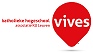<br>


**AI FUNDAMENTALS**<br>
Academiejaar 2020-2021

---



---





# OVERZICHT ZOEKALGORITMEN

## NetworkX

Om grafen voor te stellen in Python gebruiken we de package NetworkX. NetworkX zorgt voor datastructuren om grafen voor te stellen, en implementeert een aantal algoritmen om in grafen te zoeken (zoals bv. A*). De informatie die je bijhoudt in de nodes in een graaf bepaal je volledig zelf. Hieronder geven we code om de grafe die als voorbeeldprobleem gebruikt wordt in de theorie voor te stellen.

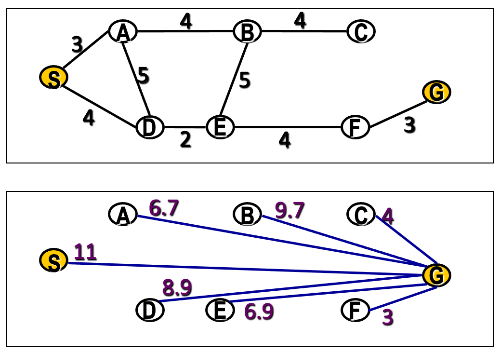

(Let op! De afstanden in vogelvlucht van A naar G en van B naar G zijn aangepast om het verschil in werking van de verschillende zoekalgoritmes duidelijker te maken!) 

Eerst importeer je de package `networkx` als `nx`:

In [1]:
import networkx as nx

Dan creëer je een `Graph` object en ken je het toe aan variabele `G`. Met de methode `add_node()` voeg je nodes toe aan de grafe. Bij elke node geef je als extra attribuut `h` mee, d.i. de heuristische waarde in 'vogelvlucht' of de 'straigth-line-distance'. Na het aanmaken van de nodes definieer je de bogen tussen de nodes met de methode `add_edge()`. Met elke boog is een kost geassocieerd.

In [2]:
G = nx.Graph()
G.add_node('S', h=11)
G.add_node('A', h=6.7)
G.add_node('B', h=9.7)
G.add_node('C', h=4)
G.add_node('D', h=8.9)
G.add_node('E', h=6.9)
G.add_node('F', h=3)
G.add_node('G', h=0)

G.add_edge("S", "A", cost=3)
G.add_edge("S", "D", cost=4)
G.add_edge("A", "D", cost=5)
G.add_edge("A", "B", cost=4)
G.add_edge("D", "E", cost=2)
G.add_edge("B", "E", cost=5)
G.add_edge("B", "C", cost=4)
G.add_edge("E", "F", cost=4)
G.add_edge("F", "G", cost=3)

Het volgende codefragment wordt gebruikt om de grafe te plotten. Variabele `pos` is een dictionary met de posities van de nodes.

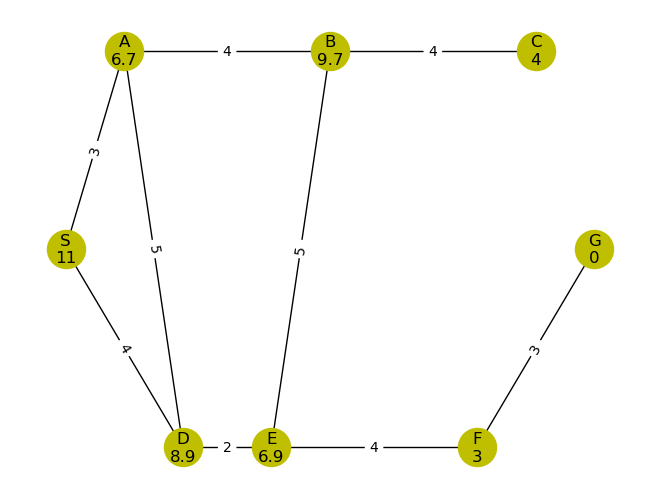

In [3]:
pos = dict(S=[0, 0.5], 
           A=[1, 1],
           D=[2, 0],
           E=[3.5, 0],
           B=[4.5, 1],
           F=[7, 0],
           C=[8, 1],
           G=[9, 0.5])
labels = {node: node + "\n" + str(h) for node, h in nx.get_node_attributes(G, 'h').items()}  # h toevoegen aan de node labels
nx.draw(G, pos, labels=labels, node_size=750, node_color="y")
nx.draw_networkx_edge_labels(
    G, pos, nx.get_edge_attributes(G, 'cost')
);

Je kan de datastructuur op verschillende manieren bevragen. Het volgende stukje code geeft een lijst van alle bogen (edges), en vraagt dan de cost van een boog tussen de nodes S en A op.

In [4]:
print(list(G.edges))
print(G.edges[('S', 'A')]['cost'])

[('S', 'A'), ('S', 'D'), ('A', 'D'), ('A', 'B'), ('B', 'E'), ('B', 'C'), ('D', 'E'), ('E', 'F'), ('F', 'G')]
3


Van elke node in de grafe kunnen de buren opgevraagd worden, dit zijn die nodes waar een boog bestaat tussen de node en de buur. In het volgende stukje code vragen we die buren op, stoppen die in een lijst en sorteren die lijst alfabetisch.

In [5]:
sorted(list(G.neighbors('A')))

['B', 'D', 'S']

Van elke node kan een dictionary opgevraagd worden die de meta-informatie van die node bijhoudt. In dit geval wordt dus voor elke node de heuristische waarde `h` bijgehouden (zie theorie!).

In [6]:
G.nodes['F']

{'h': 3}

NetworkX implementeert heel wat algoritmen die toepasbaar zijn op grafen. NetworkX biedt ook een implementatie van het A*-algoritme. De volgende codefragmenten tonen hoe dit algoritme kan uitgevoerd worden op de gegeven grafe.

In [7]:
from networkx.algorithms.shortest_paths import astar_path, astar_path_length

Met `astar_path` bereken je het pad:

In [8]:
astar_path(G, source='S', target='G', weight="cost") 

['S', 'D', 'E', 'F', 'G']

Met `astar_path_length` bereken je de totale kost:

In [9]:
astar_path_length(G, source='S', target='G', weight="cost")

13

Je kan aan deze functies ook een heuristische functie meegeven. Die functie heeft als input een node en de target node, en moet een afstand retourneren. Dat kan hier eenvoudig als volgt geïmplementeerd worden:

In [10]:
def get_h(node, target):
    return G.nodes[node]['h']

get_h("A", "G")

6.7

In [11]:
print("path:", astar_path(G, source='S', target='G', weight="cost", heuristic=get_h))
print("cost:", astar_path_length(G, source='S', target='G', weight="cost", heuristic=get_h))

path: ['S', 'D', 'E', 'F', 'G']
cost: 13


## Eigen implementatie

### State-Space OO-Model

Een gelijkaardig OO-model heb je reeds geïmplementeerd voor het doolhofprobleem. Daarin kregen de volgende concepten een plaats:
* **state**: een klasse waarin je de toestand van het zoekprobleem kan weergeven. Op een toestand moet je een move kunnen toepassen om naar een andere toestand te gaan.
* **goal**: van een bepaalde state moet je kunnen evalueren of die in de goaltoestand is of niet.
* **move**: een move bepaalt hoe je van de ene naar de andere toestand kan overgaan

Deze OO-structuur biedt een generiek kader waarin we de zoekproblemen kunnen formuleren.

Abstracte klasse `State`:

In [12]:
class State:

    def calculate_moves(self):
        pass
    
    def apply_move(self, move):
        pass
    
    def is_goal(self):
        pass

Klasse `Move`:

In [13]:
class Move:
    
    def __init__(self, state, cost):
        self.cost = cost
        self.state = state
    
    def apply_move(self):
        return self.state.apply_move(self)

We weten ondertussen dat we met een zoekalgoritme op zoek gaan naar een pad in de zoekboom om ons doel te bereiken, en dat we meestal niet de volledige zoekboom expliciet gaan berekenen. We moeten wel een pad kunnen voorstellen van startpositie naar doel. Deze paden bestaan uit knopen (Engels: nodes) in de zoekboom.

In de OO-structuur moeten dus ook paden voorgesteld kunnen worden. We gaan namelijk in de zoekboom op zoek naar een pad van de *startnode* tot de *goalnode*. Daarom voorzien we een klasse `Node`. Bij elke node houden we de `state` (toestand) bij; een bepaalde node stelt ook de toestand van het zoekprobleem voor (klasse `State`) op 'dat moment in het pad'. Daarom zal een `Node` object een `State` object bevatten (= aggregatie). 

In [14]:
class Node:
    
    def __init__(self, state):
        self.state = state
        
    def is_goal(self):
        return self.state.is_goal()
    
    def __eq__(self, other):
        return self.state == other.state
    
    def __repr__(self):
        return str(self.state)

De klasse `Path` bevat een lijst met nodes en stelt een pad voor in de zoekboom. De nodes zijn dan uiteraard de verschillende toestanden die achtereenvolgens doorlopen worden op dat pad. De klasse `Path` heeft de methode `get_children()` waarmee de volgende moves worden opgevraagd vanuit de laatste node op het pad en dus de huidige `state`. De methode voert onmiddellijk de moves uit en geeft dus nieuwe paden terug (naar de child nodes). 

De methode `path_length()` berekent de lengte van het pad, nodig bij iterative deepening, en de methode `goal_reached()` checkt of een pad de goal node bereikt. We voegen deze methode toe om de code van onze zoekalgoritmes zo veel als mogelijk onafhankelijk van onze `State` objects te maken. De methode `is_leaf()` checkt of de laatste node van het pad een leaf is, een node zonder child nodes dus, waardoor het pad niet kan uitgebreid worden.

De methode `contains_loop()` controleert of een pad een lus bevat, zodat het zoekalgoritme dergelijke paden op een generieke manier kan identificeren en verwijderen. Er is nog een methode `append_node()` om een nieuwe node aan een pad toe te voegen en op die manier een nieuw pad te bekomen. De methode `visits_node()` controleert of een pad een bepaalde node bevat.

Elk pad heeft ook een `cost`, dit is de geaccumuleerde kost van het pad.

In [15]:
import itertools

class Path:

    def __init__(self, node: Node, cost, path=None):
        self.cost = cost
        if path:
            self.nodes = path.nodes + [node]
        else:
            self.nodes = [node] # a path always consists of a start node
            
    def last_node(self):
        return self.nodes[-1]
        
    def append_node(self, node: Node, cost):
        return Path(node, self.cost + cost, self)

    def get_children(self): # return new paths!!!!
        last_node = self.last_node()
        last_state = last_node.state        
        return [self.append_node(Node(m.apply_move()), m.cost) for m in last_state.calculate_moves()]

    def goal_reached(self):
        return self.last_node().is_goal()
        
    def contains_loop(self):
        # kan efficienter? enkel laatste met voorgaande vergelijken?
        for i, j in itertools.combinations(self.nodes, 2):
            if i == j:
                return True
        return False
    
    def path_length(self):
        return len(self.nodes)

    def is_leaf(self):
        return len(list(filter(lambda p: not p.contains_loop(), self.get_children()))) == 0
    
    def visits_node(self, node):
        return node in self.nodes
    
    def __repr__(self):
        return " ".join(str(n) for n in self.nodes)

In methode `contains_loop` wordt de functie `combinations()` uit module `itertools` toegepast om alle mogelijk combinaties van 2 nodes te bepalen. Een eenvoudig voorbeeldje:

In [16]:
nodes = ['A', 'B', 'C']
for node1, node2 in itertools.combinations(nodes, 2):
    print(node1, node2)

A B
A C
B C


Je hebt een lus wanneer minstens één van de nodes meer dan 1 keer in de lijst zit.

### Concrete implementatie OO-model voor grafenprobleem

Hierboven hebben we een aantal generieke klassen opgegeven om zoekproblemen te kunnen aanpakken. Natuurlijk zal er voor elk specifiek probleem een aparte implementatie nodig zijn om probleemspecifieke zaken in kwijt te kunnen. Hiervoor zal meestal een overerving nodig zijn van de klassen `Move` en `State`. Voorbeelden heb je eerder gezien voor het doolhofprobleen (Maze) en voor de schuifpuzzel (Sliding Puzzle). Hier zorgen we voor een specifieke implementatie voor grafenproblemen zoals in de theorie gezien: we implementeren `GraphMove` en `GraphState`.

Een `GraphState` houdt bij in welke knoop (= node of `vertex`) we ons bevinden. Daarnaast vind je vanuit een object van type GraphState een verwijzing naar de grafe (`graph`) uitgedrukt in NetworkX. Verder houden we ook bij in welke vertex de goal zich bevindt (`goal_vertex`).

Een `GraphMove` houdt bij naar welke volgende vertex (`next_vertex`) er van uit een gegeven toestand (`state`) kan 'gereisd' worden en wat de bijhorende cost van die 'stap' is.

De methode `calculate_moves()` op een GraphState berekent dan de verschillende GraphMoves die mogelijk zijn vanuit een bepaalde toestand, dus een move naar alle buren van de vertex waarin de state zich bevindt.

De methode `is_goal()` controleert of een GraphState zich in de doelnode bevindt.

In [17]:
class GraphMove(Move):
    
    def __init__(self, state: State, cost, next_vertex):
        super().__init__(state, cost)
        self.next_vertex = next_vertex

In [18]:
import networkx as nx

class GraphState(State):    

    def __init__(self, graph: nx.Graph, vertex, goal_vertex):
        self.graph = graph
        self.vertex = vertex
        self.goal_vertex = goal_vertex
        
    def calculate_moves(self):
        neighbours = sorted(list(self.graph.neighbors(self.vertex)))
        return [GraphMove(self, self.graph.edges[(self.vertex, n)]['cost'], n) for n in neighbours]
    
    def is_goal(self):
        return self.vertex == self.goal_vertex
    
    def apply_move(self, move: GraphMove):
        return GraphState(self.graph, move.next_vertex, self.goal_vertex)
        
    def __eq__(self, other):
        return self.vertex == other.vertex
    
    def __repr__(self):
        return str(self.vertex)

### Heuristiek

Zoals hierboven aangegeven wordt de heuristische waarde van een node, d.i. een inschatting van de nog af te leggen weg naar het doel, bijgehouden als meta-informatie bij de nodes in de NetworkX datastructuur. We definiëren een functie om die informatie op te vragen en te gebruiken in diverse heuristische zoekalgoritmen.

In [19]:
def straight_line_heuristic(state: GraphState):
    return state.graph.nodes[state.vertex]['h']

Deze functie doet eigenlijk hetzelfde als de heuristische functie `get_h()` die we gebruikten bij het A* algoritme dat in NetworkX is ingebouwd.

## Zoekalgoritmen

In dit hoofdstuk implementeren we de zoekalgoritmen die we in de lessen hebben besproken, en maken daarbij gebruik van de generieke klassen die we hierboven hebben gedefinieerd.

### Blind search algoritmes

Blind search algoritmes zoeken 'blindelings' naar een pad tot het doel, zonder rekening 
te houden met de kost.


#### Depth First Search

Bij het Depth First Search algoritme gaan we zo diep mogelijk in de zoekboom op zoek naar de goal node. Kunnen we niet meer verder, dan moeten we terugkeren naar een bovenliggende node. Dit noemen we backtracking. Het zo diep mogelijk gaan realiseren we door de paden uit de queue te halen die er het laatst zijn aan toegevoegd, net zoals we het bovenste blad nemen van een stapel met papieren. Aangezien we in de implementatie hieronder de paden achteraan uit de queue halen met de methode `pop()`, moeten we de children achteraan toevoegen aan de queue.


In [20]:
def depth_first_search(start_node: Node):
    # start_node is a Node object
    
    # if start node is already the goal, just return a Path to start
    if start_node.is_goal():
        return Path(start_node)
  
    # initializing:
    queue = [Path(start_node, 0)]

    # continue as long as queue is not empty
    while queue:

        # pop last item (path) in queue and get its state
        path = queue.pop()
        
        # get list of children
        children = path.get_children() 
        
        # check if one of the children has reached goal
        for child in children:
            if child.goal_reached():
                return child

        # reject loops
        children = list(filter(lambda p: not p.contains_loop(), children))

        # reverse children
        children.reverse()

        # add children to queue
        queue = queue + children
        
        # print queue
        print(" ; ".join(str(q) for q in queue))

    # no solution       
    return None

#### Breadth First Search

Bij Breadth First Search werken we in de breedte, door alle nodes op een bepaalde diepte te bekijken alvorens naar een niveau lager te gaan. Dit realiseren we door de paden uit de queue te nemen die er het eerst aan toegevoegd zijn, net zoals men in een winkel de klant bedient die al het langst in de wachtrij staat. Aangezien we in de implementatie hieronder de paden achteraan uit de queue halen met de methode `pop()`, moeten we de children vooraan toevoegen aan de queue.

In [21]:
def breadth_first_search(start_node: Node):
    # start_node is a Node object
    
    # if start node is already the goal, just return a Path to start
    if start_node.is_goal():
        return Path(start_node)
  
    # initializing:
    queue = [Path(start_node, 0)]

    # continue as long as queue is not empty
    while queue:

        # pop last item (path) in queue and get its state
        path = queue.pop()
        
        # get list of children
        children = path.get_children() 
        
        # check if one of the children has reached goal
        for child in children:
            if child.goal_reached():
                return child

        # reject loops
        children = list(filter(lambda p: not p.contains_loop(), children))

        # reverse children
        children.reverse()

        # add children to queue
        queue = children + queue
        
        # print queue
        print(" ; ".join(str(q) for q in queue))

    # no solution       
    return None

#### Non-Deterministic Search

Met Non-Deterministic Search proberen we het beter te doen dan met Depth First en Breadth First search door de zoekboom kriskras te doorlopen. In het algoritme gaan we daarom de paden willkeurig toevoegen aan de queue in plaats van vooraan of achteraan.

In [22]:
import random

def non_deterministic_search(start_node: Node, seed=None):
    # start_node is a Node object
    
    # if start node is already the goal, just return a Path to start
    if start_node.is_goal():
        return Path(start_node)

    # set random seed
    random.seed(seed)

    # initializing:
    queue = [Path(start_node, 0)]

    # continue as long as queue is not empty
    while queue:

        # pop last item (path) in queue and get its state
        path = queue.pop()
        
        # get list of children
        children = path.get_children() 
        
        # check if one of the children has reached goal
        # add children to queue at random positions if they haven't reached goal and don't contain loops
        for child in children:
            # goal reached?
            if child.goal_reached():
                return child
            # contains loops?
            if not child.contains_loop():
                index = random.randint(0, len(queue))
                queue.insert(index, child)

        # print queue
        print(" ; ".join(str(q) for q in queue))

    # no solution       
    return None

#### Iterative Deepening Search

Iterative Deepening is het beste van de blind search algoritmen, omdat we daarin de voordelen van Depth First en Breadth First Search combineren. We gaan namelijk Depth First Search toepassen, maar enkel tot op een bepaalde diepte. Indien we op een bepaalde diepte geen oplossing gevonden hebben, proberen we een niveau dieper te zoeken, en gaan zo verder tot we uiteindelijk wel een oplossing vinden. Onderstaande implementatie is recursief en veronderstelt dat er altijd een goalnode en dus een oplossing is.

In [23]:
def iterative_deepening_search(start_node: Node, depth_limit=None):
    # start_node is a Node object
    # if depth_limit is a positive integer, depth-first search is performed with given depth limit
    # if depth_limit is None, iterative deepening search is applied
    
    # if start node is already the goal, just return a Path to start
    if start_node.is_goal():
        return Path(start_node)
    
    # check depth_limit
    if depth_limit is None:
        depth_limit = 1
  
    # initializing:
    queue = [Path(start_node, 0)]

    # continue as long as queue is not empty
    while queue:

        # pop last item (path) in queue and get its state
        path = queue.pop()
        
        # check depth limit
        if path.path_length() < depth_limit:

            # get list of children
            children = path.get_children()
            
            # check if one of the children has reached goal
            for child in children:
                if child.goal_reached():
                    return child

            # reject loops
            children = list(filter(lambda p: not p.contains_loop(), children))

            # reverse children
            children.reverse()

            # add children to queue
            queue = queue + children
        
            # print queue
            print(" ; ".join(str(q) for q in queue))

    # go one level deeper
    return iterative_deepening_search(start_node, depth_limit + 1)  

### Heuristic search algoritmes

In blind search gingen we blindelings op zoek naar een oplossing in de zoekboom. Het kiezen van de volgende tak tijdens het doorlopen van de zoekboom gebeurde volgens een bepaalde conventie, of zelfs volledig willekeurig. Bij heuristic search gaan we dat op een slimmere manier doen door gebruik te maken van een heuristische functie. Een heuristische functie probeert 'een getal te plakken' op een toestand. Dat getal is een schatting van 'hoever' de toestand ligt van het doel dat moet bereikt worden. In ons voorbeeld is dat getal de afstand in vogelvlucht van een bepaalde knoop tot de goal node.

#### Hill Climbing Search

Hill Climbing is in essentie Depth First Search, maar de children worden in dit geval eerst gesorteerd volgens hun heuristische waarde, alvorens ze aan de queue worden toegevoegd. Omdat het algoritme hieronder telkens het laatste pad uit de queue haalt, moeten we de children aflopend sorteren, van groot naar klein dus, en achteraan de queue toevoegen.

In [24]:
def hill_climbing_search(start_node: Node, heuristic):
    # start_node is a Node object
    # heuristic is a function
    
    # if start node is already the goal, just return a Path to start
    if start_node.is_goal():
        return Path(start_node)
  
    # initializing:
    queue = [Path(start_node, 0)]

    # continue as long as queue is not empty
    while queue:

        # pop last item (path) in queue and get its state
        path = queue.pop()
        
        # get list of children
        children = path.get_children() 
        
        # check if one of the children has reached goal
        for child in children:
            if child.goal_reached():
                return child

        # reject loops
        children = list(filter(lambda p: not p.contains_loop(), children))
        
        # sort the new paths using the heuristic and reverse
        children = sorted(children, key=lambda p: heuristic(p.last_node().state), reverse=True)
        
        # add children to queue
        queue = queue + children
        
        # print queue
        print(" ; ".join(str(q) for q in queue))

    # no solution        
    return None

#### Beam Search

Bij Beam Search willen we heuristische functies inbouwen in het Breadth First Search algoritme, en die gebruiken om het aantal takken dat we bezoeken in te perken. In plaats van alle children van een node te beschouwen en toe te voegen aan de queue, voegen we de children toe met de beste heuristische waarde. Het aantal children dat we selecteren is gelijk aan parameter `width`. In onderstaande implementatie van het algoritme hebben we bovendien een optimalisatie doorgevoerd door ook geen children te selecteren die zelf geen children hebben, zogenaamde leaves.


In [25]:
def beam_search(start_node: Node, heuristic, width):
    # start_node is a Node object
    # heuristic is a function
    # width is a positive integer
    
    # if start node is already the goal, just return a Path to start
    if start_node.is_goal():
        return Path(start_node)
  
    # initializing:
    queue = [Path(start_node, 0)]

    # continue as long as queue is not empty
    while queue:

        # create paths to all children for all paths in the queue
        queue = [child for path in queue for child in path.get_children()]
        
        # check if one of the paths in the queue has reached goal
        for path in queue:
            if path.goal_reached():
                return path

        # reject loops and paths that are leaves
        queue = list(filter(lambda p: not (p.contains_loop() or p.is_leaf()), queue))
        
        # if there are still paths left...
        if queue:

            # sort new paths using the heuristic and reverse
            queue = sorted(queue, key=lambda p: heuristic(p.last_node().state), reverse=True)
            
            # keep width best children 
            if len(queue) > width:
                queue = queue[-width:]
        
        # print queue
        print(" ; ".join(str(q) for q in queue))

    # no solution        
    return None

#### Greedy Search

Zoals de naam het zegt zal Greedy Search op een 'gulzige' manier het pad uit de queue halen met de beste heuristische waarde. Op die manier sluit dit algoritme het best aan bij Non-Deterministic Search. Omdat het algoritme hieronder telkens het laatste pad uit de queue haalt, moeten we de volledige queue aflopend sorteren, dus van groot naar klein.

In [26]:
def greedy_search(start_node: Node, heuristic):
    # start_node is a Node object
    # heuristic is a function
    
    # if start node is already the goal, just return a Path to start
    if start_node.is_goal():
        return Path(start_node)
  
    # initializing:
    queue = [Path(start_node, 0)]

    # continue as long as queue is not empty
    while queue:

        # pop last item (path) in queue and get its state
        path = queue.pop()
        
        # get list of children
        children = path.get_children() 
        
        # check if one of the children has reached goal
        for child in children:
            if child.goal_reached():
                return child

        # reject loops
        children = list(filter(lambda p: not p.contains_loop(), children))
        
        # add children to queue
        queue = queue + children

        # sort queue by heuristic
        queue = sorted(queue, key=lambda p: heuristic(p.last_node().state), reverse=True)
        
        # print queue
        print(" ; ".join(str(q) for q in queue))

    # no solution        
    return None

### Optimal search algoritmes

De vorige algoritmen zochten ofwel 'een pad' naar het doel, ofwel 'het kortste pad', waarmee het pad bedoelen langs het minste aantal knopen. Met de optimal search algoritmen zoeken we 'het meest optimale pad', en dat is het pad met de minste kost.

#### Uniform Cost Search

Het Uniform Cost zoekalgoritme lijkt sterk op Greedy Search, maar in plaats van de volledige queue te sorteren volgens heuristische waarde, sorteren we de paden volgens hun geaccumuleerde kost. Hiermee bedoelen we de totale kost die gelijk is aan de som van de kost van de edges waaruit het pad is opgebouwd. Waar de heuristische functie een schatting maakt van de afstand van een node tot het doel, kijkt de geaccumuleerde kost dus terug door de totale kost te nemen vanaf de start tot aan de node.

In [27]:
def uniform_cost_search(start_node: Node):
    # start_node is a Node object
    
    # if start node is already the goal, just return a Path to start
    if start_node.is_goal():
        return Path(start_node)
 
    # initializing:
    queue = [Path(start_node, 0)]

    # continue as long as queue is not empty
    while queue:

        # pop last item (path) in queue and get its state
        path = queue.pop()
        
        # get list of children
        children = path.get_children() 
        
        # check if one of the children has reached goal
        for child in children:
            if child.goal_reached():
                return child

        # reject loops
        children = list(filter(lambda p: not p.contains_loop(), children))
        
        # add children to queue
        queue = queue + children
        
        # sort queue by cost
        queue = sorted(queue, key=lambda p: p.cost, reverse=True)
        
        # print queue
        print(" ; ".join(str(q) for q in queue))

    # no solution       
    return None

#### Optimal Uniform Cost Search

Alle algoritmes die we tot nu toe hebben geïmplementeerd, stoppen wanneer één van de children het doel heeft bereikt. Maar uiteraard is dat het pad naar dat doel niet altijd het optimale pad, ook niet bij Uniform Cost Search. Daarom is het soms nuttig om verder te zoeken, ook al hebben we een pad naar het doel gevonden. En dat is wat we doen in het Optimal Uniform Cost zoekalgoritme. We optimaliseren Uniform Cost Search door verder te zoeken, ook al heeft één van de children het doel bereikt. We gaan echter niet oneindig lang blijven zoeken, maar stoppen wanneer het pad dat uit de queue wordt gehaald het doel heeft bereikt. Praktisch betekent dit dat we niet van de children die we aan de queue toevoegen gaan controleren of ze het doel hebben bereikt, maar wel van het pad dat we uit de queue halen. En als dat pad het doel bereikt dan stoppen we. De queue zelf gaan we net zoals in Uniform Cost Search sorteren op geaccumuleerde kost nadat we de children hebben toegevoegd.

In [28]:
def optimal_uniform_cost_search(start_node: Node):
    # start_node is a Node object

    # if start node is already the goal, just return a Path to start
    if start_node.is_goal():
        return Path(start_node)
    
    # initializing:
    queue = [Path(start_node, 0)]

    # continue as long as queue is not empty and first path in queue does not reach goal
    while queue:

        # pop last item (path) in queue and get its state
        path = queue.pop()
        
        # first path goes to goal, so stop
        if path.goal_reached():
            return path
        
        # get list of children
        children = path.get_children() 
                    
        # reject loops
        children = list(filter(lambda p: not p.contains_loop(), children))
        
        # add children to queue
        queue = queue + children
        
        # sort queue by cost
        queue = sorted(queue, key=lambda p: p.cost, reverse=True)
        
        # print queue
        print(" ; ".join(str(q) for q in queue))

    # no solution                  
    return None

#### Optimal Uniform Cost met Branch and Bound Search

Het Uniform Cost algoritme kunnen we nog verder optimaliseren door Branch and Bound toe te passen. Niet direct stoppen met zoeken klinkt mooi, maar heeft natuurlijk ook een kost op vlak van rekentijd. Met Branch and Bound proberen we daar een evenwicht in te vinden door tijdens het verder zoeken de boom te snoeien. Hoe doen we dat? Wel, we checken nu toch of een child het doel heeft bereikt, en als dat zo is, dan is de geaccumuleerde kost van van het pad naar dit doel een bovengrens (Engels: upper bound). Omdat we het optimale pad zoeken, zijn we niet geïnteresseerd in paden naar het doel met een hogere kost, en dus kunnen we alle takken met een hogere geaccumuleerde kost negeren. We filteren dus alle paden met een kost die groter is dan deze "bound" uit de queue. Ook hier stoppen we met zoeken van zodra het pad dat we uit de queue halen het doel heeft bereikt.

In [29]:
def optimal_uniform_cost_with_bb_search(start_node: Node):
    # start_node is a Node object
  
    # initializing:
    queue = [Path(start_node, 0)]

    # continue as long as queue is not empty and first path in queue does not reach goal
    bound = None
    while queue:

        # pop last item (path) in queue and get its state
        path = queue.pop()
        
        # first path goes to goal, so stop
        if path.goal_reached():
            return path
        
        # get list of children
        children = path.get_children() 
        
        # check if one of the children has reached goal
        for child in children:
            if child.goal_reached():
                if bound:
                    if child.cost < bound:
                        bound = child.cost
                else:
                    bound = child.cost
                    
        # reject loops
        children = list(filter(lambda p: not p.contains_loop(), children))
        
        # add children to queue
        queue = queue + children
        
        # check bound
        if bound:
            # remove longer paths
            queue = list(filter(lambda p: p.cost <= bound, queue))
        
        # sort queue by cost
        queue = sorted(queue, key=lambda p: p.cost, reverse=True)
        
        # print queue
        print(" ; ".join(str(q) for q in queue))
            
    # no solution
    return None

#### Estimate-Extended Uniform Cost Search

Het Estimate-Extended Uniform Cost zoekalgoritme is in feite niks anders dan het Optimal Uniform Cost zoekalgoritme, maar i.p.v. de queue te sorteren op geaccumuleerde kost, sorteren we op f-waarde. Maar wat is de f-waarde? 

Het probleem bij de vorige drie optimal search algoritmes is dat er geen rekening gehouden wordt met wat er nog komt op het pad, omdat ze alleen rekening houden met de geaccumuleerde kost. We lossen dat hier op door ook rekening te houden met de 'afstand' vanuit een knoop naar het doel, met de heuristische functie dus. En dat doen we door eenvoudigweg de heuristische waarde van een knoop op te tellen bij de geaccumuleerde kost. Dit is de f-waarde, en hoe lager die waarde is, hoe meer kans dat een pad via die knoop het optimale pad naar het doel is. Dit is geen zekerheid, maar wanneer we een goede heuristische functie definiëren, dan zal dit algoritme het optimale pad vinden!

In [30]:
def estimate_extended_uniform_cost_search(start_node: Node, heuristic):
    # start_node is a Node object

    # if start node is already the goal, just return a Path to start
    if start_node.is_goal():
        return Path(start_node)
    
    # initializing:
    queue = [Path(start_node, 0)]

    # continue as long as queue is not empty and first path in queue does not reach goal
    while queue:

        # pop last item (path) in queue and get its state
        path = queue.pop()
        
        # first path goes to goal, so stop
        if path.goal_reached():
            return path
        
        # get list of children
        children = path.get_children() 
                    
        # reject loops
        children = list(filter(lambda p: not p.contains_loop(), children))
        
        # add children to queue
        queue = queue + children
        
        # sort queue by cost + heuristic
        queue = sorted(queue, key=lambda p: p.cost + heuristic(p.last_node().state), reverse=True)
        
        # print queue
        print(" ; ".join(str(q) for q in queue))

    # no solution                  
    return None

#### A* Search

Het A* zoekalgoritme is het Optimal Uniform Cost zoekalgoritme, uitgebreid met de
volgende drie optimalisatietechnieken: 
- Branch and Bound
- Estimate Extension, d.i. gebruik maken van de f-waarde
- Redundant Path Deletion

De laatste techniek verwijdert redundante of overtollige paden. Dat is een pad P dat eindigt in een knoop I en een hogere kost heeft dan een pad Q dat knoop I bevat.

In [31]:
import itertools

def a_star_search(start_node: Node, heuristic):
    # start_node is a Node object
    # heuristic is a function

    # initializing:
    queue = [Path(start_node, 0)]

    # continue as long as queue is not empty and first path in queue does not reach goal
    bound = None
    while queue:

        # pop last item (path) in queue and get its state
        path = queue.pop()
        
        # first path goes to goal, so stop
        if path.goal_reached():
            return path
        
        # get list of children
        children = path.get_children() 
        
        # check if one of the children has reached goal
        for child in children:
            if child.goal_reached():
                if bound:
                    if child.cost < bound:
                        bound = child.cost
                else:
                    bound = child.cost
                    
        # reject loops
        children = list(filter(lambda p: not p.contains_loop(), children))
        
        # add children to queue
        queue = queue + children
        
        # check bound
        if bound:
            # remove longer paths
            queue = list(filter(lambda p: p.cost <= bound, queue))
        
        # redundant path deletion
        to_remove = []
        for p, q in itertools.permutations(queue, 2):
            I = p.last_node()
            cost_p = p.cost
            q_visits_i = q.visits_node(I)
            cost_q = q.cost
            
            if q_visits_i and cost_p >= cost_q:
                to_remove.append(p)
                
        queue = [q for q in queue if not q in to_remove]
        
        # sort queue by cost + heuristic
        queue = sorted(queue, key=lambda p: p.cost + heuristic(p.last_node().state), reverse=True)
        
        # print queue
        print(" ; ".join(str(q) for q in queue))
            
    # no solution        
    return None

Merk op dat er hier van de functie `permutations()` uit de module `itertools` wordt gebruik gemaakt in plaats van de functie `combinations()`. Met dit eenvoudig voorbeeld zie je duidelijk het verschil tussen de twee:

In [32]:
nodes = ['A', 'B', 'C']
print('permutations:')
for permutation in itertools.permutations(nodes, 2):
    print(permutation)
print()
print('combinations:')
for combination in itertools.combinations(nodes, 2):
    print(combination)

permutations:
('A', 'B')
('A', 'C')
('B', 'A')
('B', 'C')
('C', 'A')
('C', 'B')

combinations:
('A', 'B')
('A', 'C')
('B', 'C')


## Resultaten

Hieronder zie je de resultaten van de verschillende algoritmes toegepast op het voorbeeldprobleem. We printen tijdens het uitvoeren van het algoritme de toestand van de queue. Na afloop van het algoritme printen we het gevonden pad en de kost van het pad. Let vooral op de verschillen in speed, memory en optimality van de algoritmen en bespreek die verschillen!

In [33]:
start_state = GraphState(G, 'S', 'G')
start_state

S

In [34]:
path = depth_first_search(Node(start_state))
print()
print("path:", path)
print("cost:", path.cost)

S D ; S A
S D ; S A D ; S A B
S D ; S A D ; S A B E ; S A B C
S D ; S A D ; S A B E
S D ; S A D ; S A B E F ; S A B E D
S D ; S A D ; S A B E F

path: S A B E F G
cost: 19


In [35]:
path = breadth_first_search(Node(start_state))
print()
print("path:", path)
print("cost:", path.cost)

S D ; S A
S A D ; S A B ; S D
S D E ; S D A ; S A D ; S A B
S A B E ; S A B C ; S D E ; S D A ; S A D
S A D E ; S A B E ; S A B C ; S D E ; S D A
S D A B ; S A D E ; S A B E ; S A B C ; S D E
S D E F ; S D E B ; S D A B ; S A D E ; S A B E ; S A B C
S D E F ; S D E B ; S D A B ; S A D E ; S A B E
S A B E F ; S A B E D ; S D E F ; S D E B ; S D A B ; S A D E
S A D E F ; S A D E B ; S A B E F ; S A B E D ; S D E F ; S D E B ; S D A B
S D A B E ; S D A B C ; S A D E F ; S A D E B ; S A B E F ; S A B E D ; S D E F ; S D E B
S D E B C ; S D E B A ; S D A B E ; S D A B C ; S A D E F ; S A D E B ; S A B E F ; S A B E D ; S D E F

path: S D E F G
cost: 13


In [65]:
path = non_deterministic_search(Node(start_state), seed=10)
print()
print("path:", path)
print("cost:", path.cost)

S A ; S D
S A ; S D A ; S D E
S D E B ; S D E F ; S A ; S D A
S D E B ; S D E F ; S A ; S D A B
S D E B ; S D E F ; S D A B E ; S A ; S D A B C
S D E B ; S D E F ; S D A B E ; S A
S A D ; S D E B ; S A B ; S D E F ; S D A B E
S A D ; S D E B ; S A B ; S D E F ; S D A B E F

path: S D A B E F G
cost: 25


In [66]:
path = iterative_deepening_search(Node(start_state))
print()
print("path:", path)
print("cost:", path.cost)

S D ; S A
S D ; S A
S D ; S A D ; S A B
S D E ; S D A
S D ; S A
S D ; S A D ; S A B
S D ; S A D ; S A B E ; S A B C
S D ; S A D E
S D E ; S D A
S D E ; S D A B
S D E F ; S D E B
S D ; S A
S D ; S A D ; S A B
S D ; S A D ; S A B E ; S A B C
S D ; S A D ; S A B E
S D ; S A D ; S A B E F ; S A B E D
S D ; S A D E
S D ; S A D E F ; S A D E B
S D E ; S D A
S D E ; S D A B
S D E ; S D A B E ; S D A B C
S D E F ; S D E B
S D E F ; S D E B C ; S D E B A

path: S D E F G
cost: 13


In [67]:
path = hill_climbing_search(Node(start_state), straight_line_heuristic)
print()
print("path:", path)
print("cost:", path.cost)

S D ; S A
S D ; S A B ; S A D
S D ; S A B ; S A D E
S D ; S A B ; S A D E B ; S A D E F

path: S A D E F G
cost: 17


In [68]:
path = beam_search(Node(start_state), straight_line_heuristic, width=2)
print()
print("path:", path)
print("cost:", path.cost)

S D ; S A
S D E ; S D A
S D A B ; S D E F

path: S D E F G
cost: 13


In [69]:
path = greedy_search(Node(start_state), straight_line_heuristic)
print()
print("path:", path)
print("cost:", path.cost)

S D ; S A
S A B ; S D ; S A D
S A B ; S D ; S A D E
S A B ; S A D E B ; S D ; S A D E F

path: S A D E F G
cost: 17


In [70]:
path = uniform_cost_search(Node(start_state))
print()
print("path:", path)
print("cost:", path.cost)

S D ; S A
S A D ; S A B ; S D
S D A ; S A D ; S A B ; S D E
S D E B ; S D E F ; S D A ; S A D ; S A B
S A B E ; S D E B ; S A B C ; S D E F ; S D A ; S A D
S A B E ; S D E B ; S A B C ; S D E F ; S A D E ; S D A
S D A B ; S A B E ; S D E B ; S A B C ; S D E F ; S A D E
S A D E B ; S A D E F ; S D A B ; S A B E ; S D E B ; S A B C ; S D E F

path: S D E F G
cost: 13


In [71]:
path = optimal_uniform_cost_search(Node(start_state))
print()
print("path:", path)
print("cost:", path.cost)

S D ; S A
S A D ; S A B ; S D
S D A ; S A D ; S A B ; S D E
S D E B ; S D E F ; S D A ; S A D ; S A B
S A B E ; S D E B ; S A B C ; S D E F ; S D A ; S A D
S A B E ; S D E B ; S A B C ; S D E F ; S A D E ; S D A
S D A B ; S A B E ; S D E B ; S A B C ; S D E F ; S A D E
S A D E B ; S A D E F ; S D A B ; S A B E ; S D E B ; S A B C ; S D E F
S A D E B ; S A D E F ; S D A B ; S D E F G ; S A B E ; S D E B ; S A B C
S A D E B ; S A D E F ; S D A B ; S D E F G ; S A B E ; S D E B
S A D E B ; S D E B A ; S D E B C ; S A D E F ; S D A B ; S D E F G ; S A B E
S A B E F ; S A D E B ; S D E B A ; S D E B C ; S A D E F ; S A B E D ; S D A B ; S D E F G

path: S D E F G
cost: 13


In [43]:
path = optimal_uniform_cost_with_bb_search(Node(start_state))
print()
print("path:", path)
print("cost:", path.cost)

S D ; S A
S A D ; S A B ; S D
S D A ; S A D ; S A B ; S D E
S D E B ; S D E F ; S D A ; S A D ; S A B
S A B E ; S D E B ; S A B C ; S D E F ; S D A ; S A D
S A B E ; S D E B ; S A B C ; S D E F ; S A D E ; S D A
S D A B ; S A B E ; S D E B ; S A B C ; S D E F ; S A D E
S A D E B ; S A D E F ; S D A B ; S A B E ; S D E B ; S A B C ; S D E F
S D A B ; S D E F G ; S A B E ; S D E B ; S A B C
S D A B ; S D E F G ; S A B E ; S D E B
S D A B ; S D E F G ; S A B E
S D A B ; S D E F G

path: S D E F G
cost: 13


In [72]:
path = estimate_extended_uniform_cost_search(Node(start_state), straight_line_heuristic)
print()
print("path:", path)
print("cost:", path.cost)

S D ; S A
S A D ; S A B ; S D
S A D ; S A B ; S D A ; S D E
S D E B ; S A D ; S A B ; S D A ; S D E F
S D E B ; S A D ; S A B ; S D A ; S D E F G

path: S D E F G
cost: 13


In [73]:
path = a_star_search(Node(start_state), straight_line_heuristic)
print()
print("path:", path)
print("cost:", path.cost)

S D ; S A
S A B ; S D
S A B ; S D E
S A B ; S D E F
S A B ; S D E F G

path: S D E F G
cost: 13


## Opdracht

Maak gebruik van NetworkX om de graaf op de figuur te implementeren. Pas dan alle zoekalgoritmes toe om een pad te vinden van A naar J. Vergelijk en bespreek de resultaten 

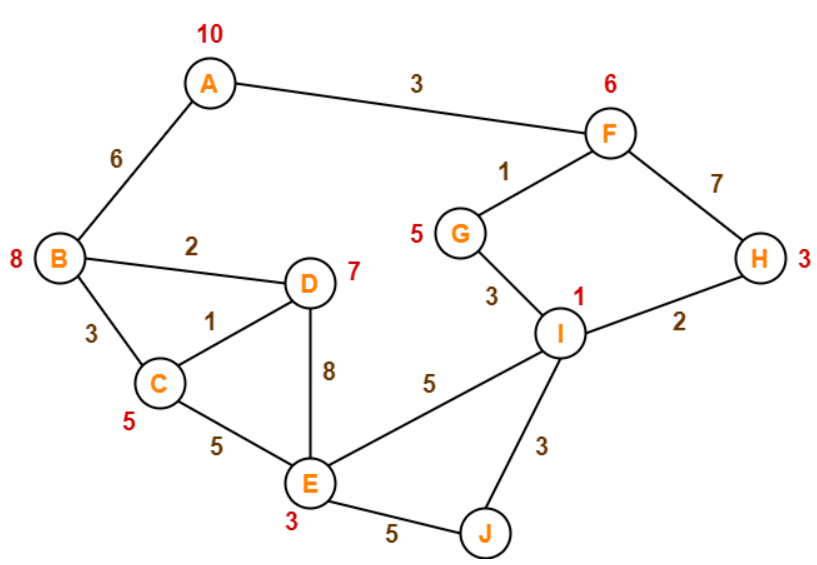

In [46]:
import networkx as nx

# Graph object creëren
G = nx.Graph()

In [47]:
# vertices (nodes) definiëren
G.add_node('A', h=10)
G.add_node('B', h=8)
G.add_node('C', h=5)
G.add_node('D', h=7)
G.add_node('E', h=3)
G.add_node('F', h=6)
G.add_node('G', h=5)
G.add_node('H', h=3)
G.add_node('I', h=1)
G.add_node('J', h=0)

In [48]:
# bogen (edges) definiëren
G.add_edge("A", "B", cost=6)
G.add_edge("A", "F", cost=3)
G.add_edge("B", "C", cost=3)
G.add_edge("B", "D", cost=2)
G.add_edge("C", "D", cost=1)
G.add_edge("C", "E", cost=5)
G.add_edge("D", "E", cost=8)
G.add_edge("E", "I", cost=5)
G.add_edge("E", "J", cost=5)
G.add_edge("F", "G", cost=1)
G.add_edge("F", "H", cost=7)
G.add_edge("G", "I", cost=3)
G.add_edge("H", "I", cost=2)
G.add_edge("I", "J", cost=3)

In [49]:
# A* toepassen uit networkx
from networkx.algorithms.shortest_paths import astar_path, astar_path_length

# heuristische functie
def get_h(node, target):
    return G.nodes[node]['h']

print("path:", astar_path(G, source='A', target='J', weight="cost", heuristic=get_h))
print("cost:", astar_path_length(G, source='A', target='J', weight="cost", heuristic=get_h))

path: ['A', 'F', 'G', 'I', 'J']
cost: 10


In [50]:
# eigen algoritmen toepassen
start_node = Node(GraphState(G, 'A', 'J'))
start_node

A

In [51]:
# heuristische functie
def straight_line_heuristic(state: GraphState):
    return state.graph.nodes[state.vertex]['h']

In [52]:
# printfunctie
def print_result(path):
    print()
    print("path:", path)
    print("cost:", path.cost)

In [53]:
print_result(depth_first_search(start_node))

A F ; A B
A F ; A B D ; A B C
A F ; A B D ; A B C E ; A B C D
A F ; A B D ; A B C E ; A B C D E

path: A B C D E J
cost: 23


In [54]:
print_result(breadth_first_search(start_node))

A F ; A B
A B D ; A B C ; A F
A F H ; A F G ; A B D ; A B C
A B C E ; A B C D ; A F H ; A F G ; A B D
A B D E ; A B D C ; A B C E ; A B C D ; A F H ; A F G
A F G I ; A B D E ; A B D C ; A B C E ; A B C D ; A F H
A F H I ; A F G I ; A B D E ; A B D C ; A B C E ; A B C D
A B C D E ; A F H I ; A F G I ; A B D E ; A B D C ; A B C E

path: A B C E J
cost: 19


In [55]:
print_result(non_deterministic_search(start_node, seed=10))

A B ; A F
A B ; A F G ; A F H
A F H I ; A B ; A F G
A F G I ; A F H I ; A B
A F G I ; A B C ; A F H I ; A B D
A F G I ; A B D E ; A B C ; A B D C ; A F H I

path: A F H I J
cost: 15


In [56]:
print_result(iterative_deepening_search(start_node))

A F ; A B
A F ; A B
A F ; A B D ; A B C
A F H ; A F G
A F ; A B
A F ; A B D ; A B C
A F ; A B D ; A B C E ; A B C D
A F ; A B D E ; A B D C
A F H ; A F G
A F H ; A F G I
A F H I
A F ; A B
A F ; A B D ; A B C
A F ; A B D ; A B C E ; A B C D
A F ; A B D ; A B C E ; A B C D E

path: A B C E J
cost: 19


In [57]:
print_result(hill_climbing_search(start_node, straight_line_heuristic))

A B ; A F
A B ; A F G ; A F H
A B ; A F G ; A F H I

path: A F H I J
cost: 15


In [58]:
print_result(beam_search(start_node, straight_line_heuristic, width=2))

A B ; A F
A F G ; A F H
A F G I ; A F H I

path: A F G I J
cost: 10


In [59]:
print_result(greedy_search(start_node, straight_line_heuristic))

A B ; A F
A B ; A F G ; A F H
A B ; A F G ; A F H I

path: A F H I J
cost: 15


In [60]:
print_result(uniform_cost_search(start_node))

A B ; A F
A F H ; A B ; A F G
A F H ; A F G I ; A B
A F H ; A B C ; A B D ; A F G I

path: A F G I J
cost: 10


In [61]:
print_result(optimal_uniform_cost_search(start_node))

A B ; A F
A F H ; A B ; A F G
A F H ; A F G I ; A B
A F H ; A B C ; A B D ; A F G I
A F G I E ; A F H ; A F G I J ; A B C ; A F G I H ; A B D
A B D E ; A F G I E ; A F H ; A F G I J ; A B C ; A F G I H ; A B D C
A B D E ; A B D C E ; A F G I E ; A F H ; A F G I J ; A B C ; A F G I H
A B D E ; A B D C E ; A F G I E ; A F H ; A F G I J ; A B C
A B D E ; A B D C E ; A B C E ; A F G I E ; A F H ; A F G I J ; A B C D
A B C D E ; A B D E ; A B D C E ; A B C E ; A F G I E ; A F H ; A F G I J

path: A F G I J
cost: 10


In [62]:
print_result(optimal_uniform_cost_with_bb_search(start_node))

A B ; A F
A F H ; A B ; A F G
A F H ; A F G I ; A B
A F H ; A B C ; A B D ; A F G I
A F H ; A F G I J ; A B C ; A F G I H ; A B D
A F H ; A F G I J ; A B C ; A F G I H ; A B D C
A F H ; A F G I J ; A B C ; A F G I H
A F H ; A F G I J ; A B C
A F H ; A F G I J ; A B C D
A F H ; A F G I J

path: A F G I J
cost: 10


In [63]:
print_result(estimate_extended_uniform_cost_search(start_node, straight_line_heuristic))

A B ; A F
A B ; A F H ; A F G
A B ; A F H ; A F G I
A F G I E ; A B ; A F H ; A F G I H ; A F G I J

path: A F G I J
cost: 10


In [64]:
print_result(a_star_search(start_node, straight_line_heuristic))

A B ; A F
A B ; A F H ; A F G
A B ; A F H ; A F G I
A B ; A F G I H ; A F G I J

path: A F G I J
cost: 10
